In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris
import os

In [6]:
# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [7]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

In [8]:
# Setting paths
current_dir = os.getcwd()  # Use os.getcwd() to get the current working directory
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data")
file_path = os.path.join(data_dir, "")
cars_csv_path = os.path.join(data_dir, "train.csv")
#----------------------------------------------------------------------------------------------------
# Creading dataframes
df_car = pd.read_csv(cars_csv_path)

In [9]:
df_car = pd.read_csv(cars_csv_path)
df_car.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
149391,149391,GMC,Grand Cherokee Laredo,2013,120000,E85 Flex Fuel,290.0HP 3.6L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,8500
102779,102779,INFINITI,QX60 Base,2018,72900,Gasoline,295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,CVT Transmission,Gray,Black,None reported,Yes,29000
19150,19150,Porsche,911 Turbo S,2021,15882,Gasoline,580.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Silver,Black,None reported,Yes,130000
132691,132691,Maserati,Quattroporte Modena Q4,2019,17451,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,8-Speed Automatic,Blu,Tan,None reported,Yes,39860
62618,62618,Acura,RDX Base,2019,20400,Gasoline,279.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,9-Speed A/T,Red,Black,At least 1 accident or damage reported,Yes,36995


In [10]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [11]:
df_car.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [12]:
def check_missing_data(df_car):
    nulls = df_car.isnull().sum()
    null_percentage = (nulls / len(df_car) * 100).round(2)
    null_report = pd.DataFrame({'null content': nulls, 'null%':null_percentage})
    print(f"Qty of rows: ({len(df_car)})")
    print(null_report)

check_df = check_missing_data(df_car)
# Visualizar los datos faltantes  


Qty of rows: (188533)
              null content  null%
id                       0   0.00
brand                    0   0.00
model                    0   0.00
model_year               0   0.00
milage                   0   0.00
fuel_type             5083   2.70
engine                   0   0.00
transmission             0   0.00
ext_col                  0   0.00
int_col                  0   0.00
accident              2452   1.30
clean_title          21419  11.36
price                    0   0.00


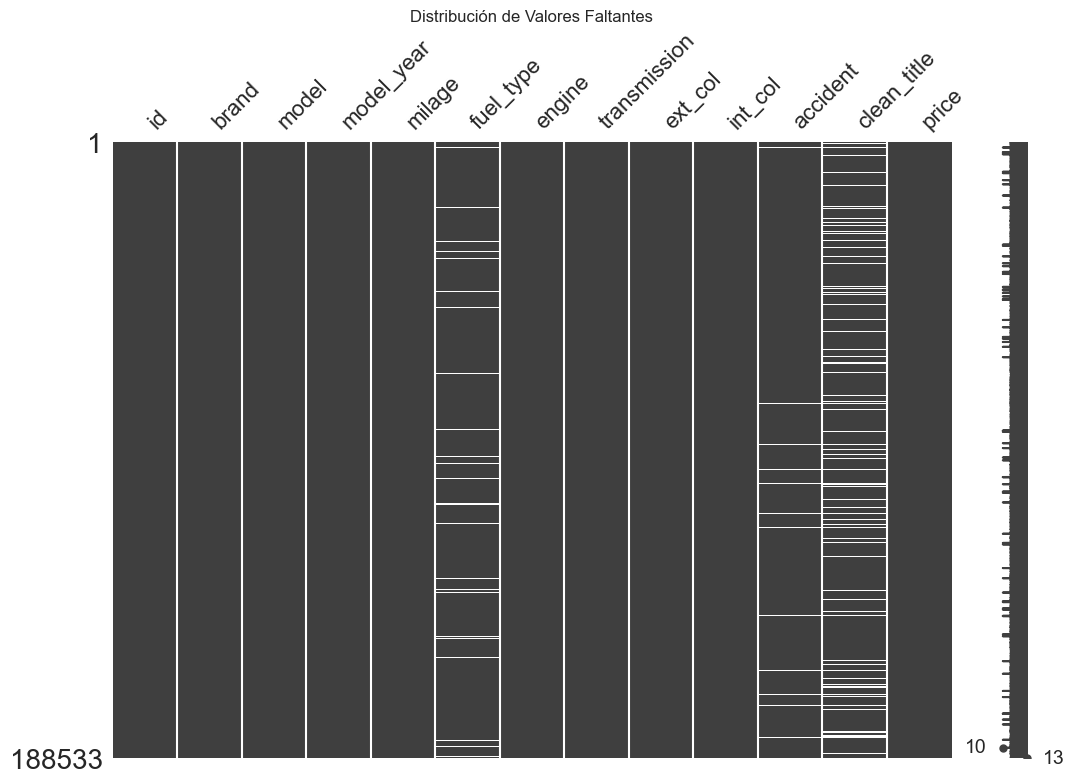

In [13]:
# Visualización de valores faltantes
msno.matrix(df_car, figsize=(12, 8))
plt.title('Distribución de Valores Faltantes')
plt.show()


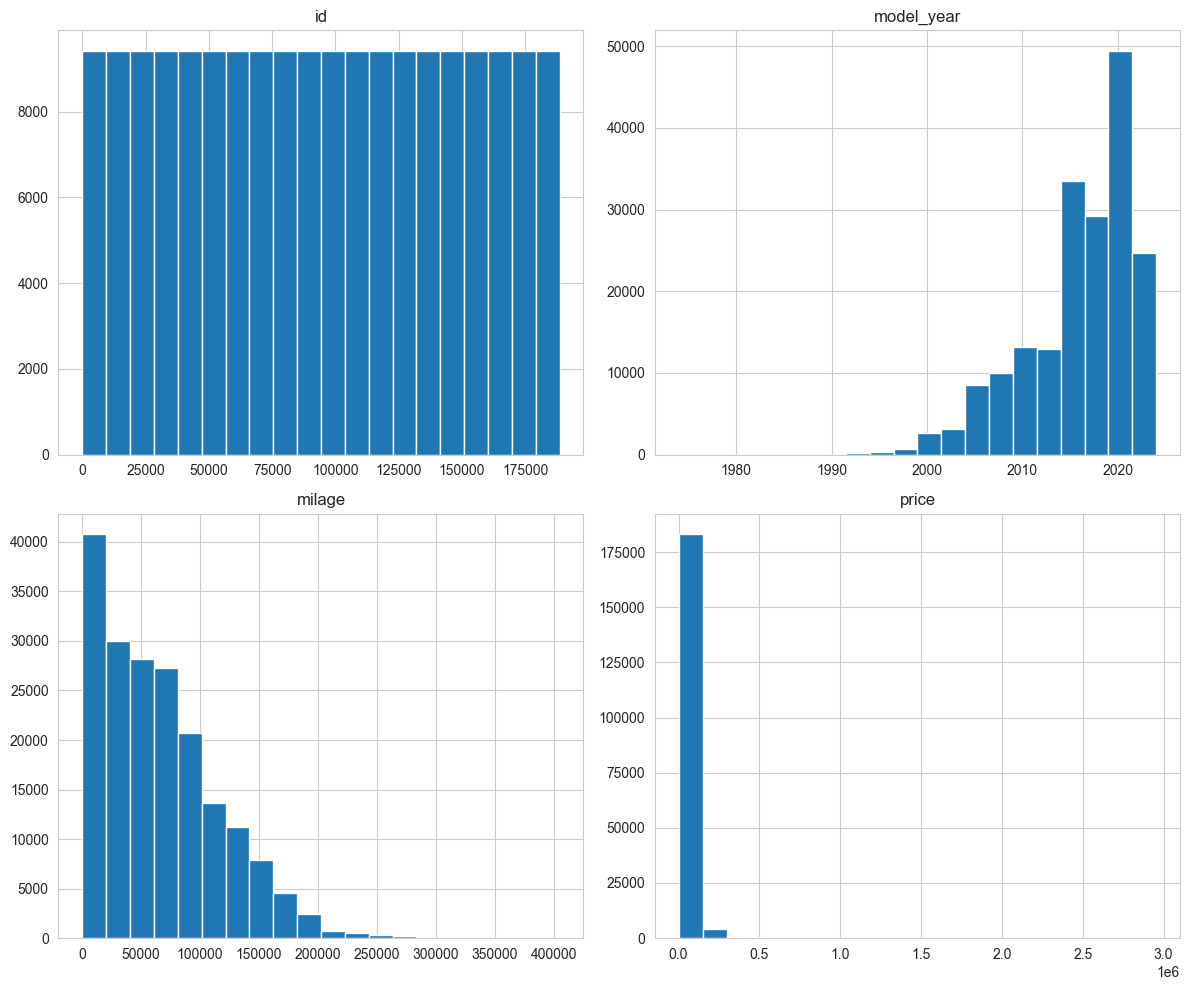

In [14]:
# Histogramas para todas las variables numéricas
df_car.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

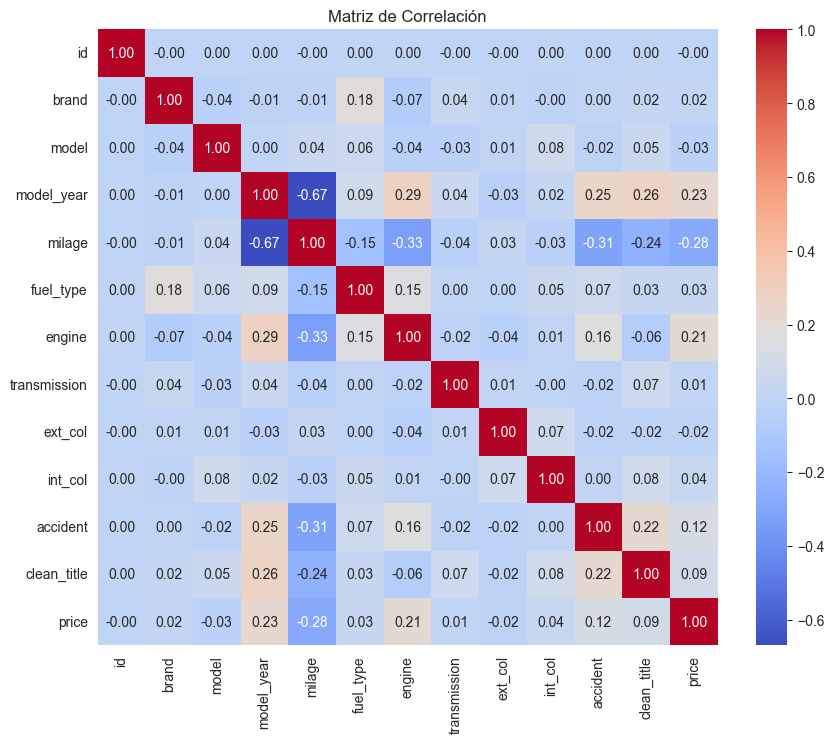

In [15]:
# Copiar el DataFrame original para no modificarlo directamente
df_encoded = df_car.copy()
# Codificar las columnas categóricas con LabelEncoder
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [16]:
for col in df_car.select_dtypes(include=['float64', 'int64']).columns:
    stat, p = shapiro(df_car[col].dropna())
    print(f"{col}: p-value = {p:.4f}")  # p < 0.05 → no normal

id: p-value = 0.0000
model_year: p-value = 0.0000
milage: p-value = 0.0000
price: p-value = 0.0000


c:\Users\Administrator\Desktop\proyecto_5\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 188533.
  res = hypotest_fun_out(*samples, **kwds)


In [17]:
from scipy.stats import kstest
for col in df_car.select_dtypes(include=['float64', 'int64']).columns:
    data = df_car[col].dropna()
    stat, p = kstest(data, 'norm')
    print(f"{col}: p-value = {p:.4f}")

id: p-value = 0.0000
model_year: p-value = 0.0000
milage: p-value = 0.0000
price: p-value = 0.0000


In [18]:
target_corr = df_encoded.corr()[""].sort_values(ascending=False)
print("\nCorrelación con la variable objetivo (strength):\n", target_corr)

KeyError: ''

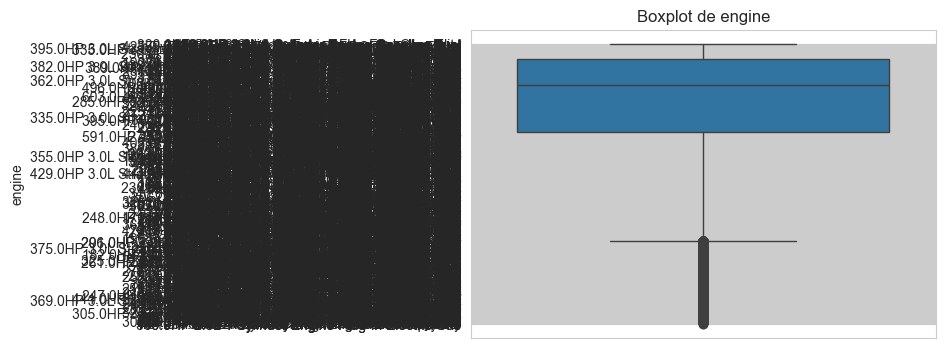

In [19]:
sns.boxplot(data=df_car, y='engine')
plt.title("Boxplot de engine")
plt.show()
